<font color='red'> Sprint 4 Project

<font color='red'>the plan for this project
1. create streamlit with render, add a streamlit configuration file to git repository at .streamlit/config.toml
    
2. create account on render.com and create a new web service
3. Create a new web service linked to Github repository
4. Configure the new Render web service. at Build Command, add pip install streamlit & pip install -r requirements.txt
add Start Command, add: streamlit run app.py
5. Deploy to Render,
6. Verify application is accessible at the following URL: https://sprint4-1kgb.onrender.com/
    <font color='red'>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import streamlit as st
import seaborn as sns

df = pd.read_csv('/Users/hannysetiawan/Downloads/vehicles_us.csv', sep=',')

<font color='red'> display table

In [2]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [3]:
df.describe().T.astype(int)

,count,mean,std,min,25%,50%,75%,max
price,51525,12132,10040,1,5000,9000,16839,375000
model_year,47906,2009,6,1908,2006,2011,2014,2019
cylinders,46265,6,1,3,4,6,8,12
odometer,43633,115553,65094,0,70000,113000,155000,990000
is_4wd,25572,1,0,1,1,1,1,1
days_listed,51525,39,28,0,19,33,53,271


In [4]:
df.duplicated().sum()

0

<font color='red'>no duplicate found

In [5]:
len(df[df.isnull().any(axis=1)])/len(df)

0.7117515769044154

<font color='red'>70% of rows has at least one missing value

In [6]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

<font color='red'> found missing value at column model_year, cylinders, odometer, paint_color, is_4wd

In [7]:
model_year_median = df.groupby('model')['model_year'].median()
model_year_median

model
acura tl             2007.0
bmw x5               2010.0
buick enclave        2012.0
cadillac escalade    2009.0
chevrolet camaro     2013.0
                      ...  
toyota sienna        2008.0
toyota tacoma        2010.0
toyota tundra        2009.0
volkswagen jetta     2012.0
volkswagen passat    2013.0
Name: model_year, Length: 100, dtype: float64

<font color='red'> group model and model year for median value

In [8]:
df['model_year'] = df.apply(lambda row: model_year_median[row['model']] if pd.isna(row['model_year']) else row['model_year'], axis=1)
df['model_year'].head()

0    2011.0
1    2011.0
2    2013.0
3    2003.0
4    2017.0
Name: model_year, dtype: float64

<font color='red'> fill model_year with median filling

In [9]:
df['model_year'] = df['model_year'].astype(int)

<font color='red'> model_year value convert to interger

In [38]:
odometer_mean = df.groupby('model_year')['odometer'].mean()
odometer_mean

model_year
1908    169328.000000
1929              NaN
1936     30000.000000
1948      4000.000000
1949      1800.000000
            ...      
2015     82503.819348
2016     61256.083854
2017     47317.910506
2018     25309.197445
2019     17076.810976
Name: odometer, Length: 68, dtype: float64

<font color='red'> group model year and odometer for mean value

In [24]:
df['odometer'] = df.apply(lambda row: odometer_mean[row['model_year']] if pd.isna(row['odometer']) else row['odometer'], axis=1)
df['odometer'].head()

0    145000.000000
1     88705.000000
2    110000.000000
3    162071.751024
4     80903.000000
Name: odometer, dtype: float64

<font color='red'> fill odometer with mean filling

In [26]:
check = df[df['odometer'].isnull()]
check

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929,ford f-150,good,8,gas,NaN,manual,other,silver,0,2018-11-18,59


<font color='red'> odometer on year 1929 still have NAN

In [28]:
check_model_year = df[df['model_year'] == 1929] 
check_model_year

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929,ford f-150,good,8,gas,NaN,manual,other,silver,0,2018-11-18,59


<font color='red'> odometer on year 1929 still have NAN

In [39]:
odometer_mean_fill = df['odometer'].mean()

In [40]:
df['odometer'].fillna(odometer_mean_fill, inplace=True)

In [41]:
df['odometer'].astype(int)

0        145000
1         88705
2        110000
3        162071
4         80903
          ...  
51520     88136
51521    181500
51522    128000
51523    139573
51524     93648
Name: odometer, Length: 51525, dtype: int64

In [13]:
cylinders_median = df.groupby('model')['cylinders'].median()
cylinders_median

model
acura tl             6.0
bmw x5               6.0
buick enclave        6.0
cadillac escalade    8.0
chevrolet camaro     6.0
                    ... 
toyota sienna        6.0
toyota tacoma        6.0
toyota tundra        8.0
volkswagen jetta     4.0
volkswagen passat    4.0
Name: cylinders, Length: 100, dtype: float64

<font color='red'> group cylinders and model for median value

In [14]:
df['cylinders'] = df.apply(lambda row: cylinders_median[row['model']] if pd.isna(row['cylinders']) else row['cylinders'], axis=1)
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6.0,gas,145000.000000,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011,ford f-150,good,6.0,gas,88705.000000,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.000000,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003,ford f-150,fair,8.0,gas,162071.751024,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.000000,automatic,sedan,black,NaN,2019-04-02,28


<font color='red'> fill cylinders with median filling

In [15]:
df['cylinders'] = df['cylinders'].astype(int)

<font color='red'>type to interger

In [16]:
df['cylinders'].isnull().sum()

0

<font color='red'>no more missing value in cylinders

In [17]:
df['paint_color'].fillna('no info', inplace=True)

<font color='red'>fill paint_color with no info

In [18]:
df['is_4wd'].fillna(0, inplace=True)

<font color='red'>fill is_4wd by 0

In [19]:
df['is_4wd'] = df['is_4wd'].astype(int)

<font color='red'>type to interger

In [32]:
df.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        1
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

<font color='red'>no missing value found

In [51]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000.000000,automatic,SUV,no info,1,2018-06-23,19
1,25500,2011,ford f-150,good,6,gas,88705.000000,automatic,pickup,white,1,2018-10-19,50
2,5500,2013,hyundai sonata,like new,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f-150,fair,8,gas,162071.751024,automatic,pickup,no info,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28


<font color='red'>display table all with int

In [47]:
plt.style.use('dark_background')

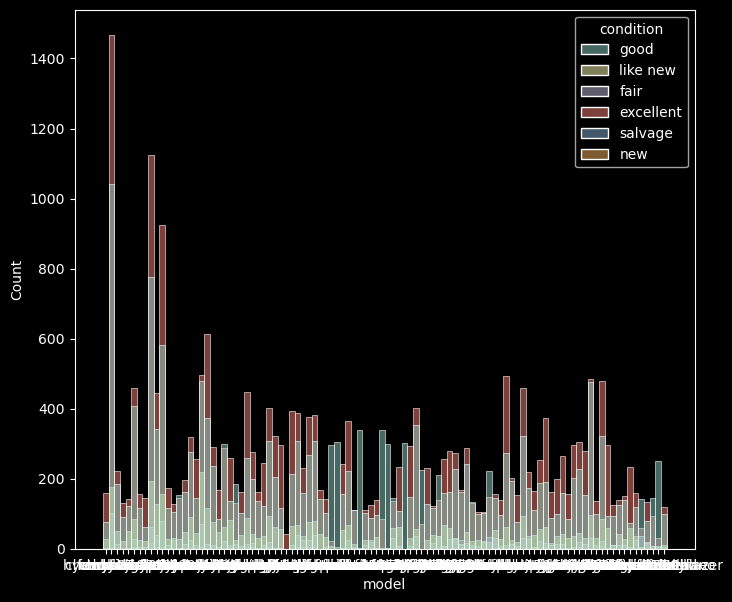

In [48]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.histplot(df, x="model", 
                  hue="condition")

<font color='red'>visualization histogram

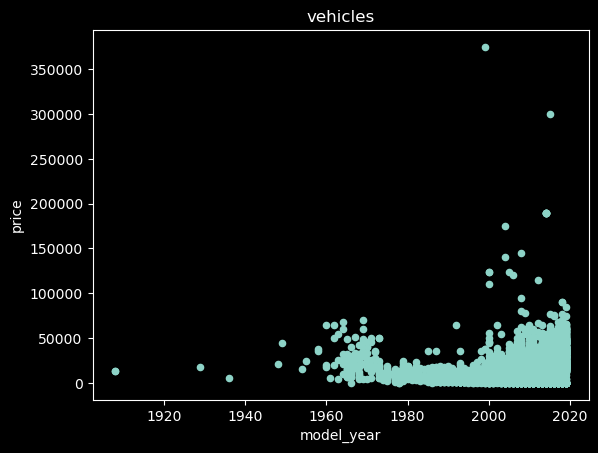

In [50]:
df.plot(kind = 'scatter', 
                          title = 'vehicles',
                          x = 'model_year',
                          y = 'price',
                          xlabel = 'model_year',
                          ylabel = 'price'
                          )

plt.show()

<font color='red'>visualization scatter

<font color='blue'> conclusions 
    * creating and managing python virtual environments, developing a web application, and deploying it to a cloud service and make it accessible to the public
    * the target to achieve web app accessible via a browser, and can be visualize more easier with check box the graph